In [0]:
#@title Código de suporte
!pip install pySUS

In [93]:
#@title Código de suporte
# preparação do ambiente
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from pysus.utilities.readdbc import read_dbc
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

pd.set_option('display.max_colwidth', -1)

root_folder = 'drive/My Drive'
project_folder = '/Colab Notebooks/analise_exploratoria'
database_root = '/res/database/data'
metadata_folder = '/res/database/metadata'
database_csv = '/csv'
database_dbc = '/dbc'

campos_sinasc = pd.read_excel(f'{root_folder}{project_folder}{metadata_folder}/campos_sinasc.xlsx')
sinasc_ac2017 = read_dbc(f'{root_folder}{project_folder}{database_root}{database_dbc}/AC/DNAC2017.dbc', encoding='iso-8859-1')
sinasc_ac2017['IDADEMAE'] = pd.to_numeric(sinasc_ac2017['IDADEMAE'])
#sinasc_ac2017['IDADEMAE'] = sinasc_ac2017['IDADEMAE'].astype(int)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Curso de Atualização em Health Data Science Analytics
## Novembro/2019

## Análise Exploratória de Dados


# Apresentação
## Prof. Me Fernando Sequeira Sousa



*   Bacharel em Informática Biomédica - FMRP/FFCLRP - USP
*   Mestre em Ciência - Área de Gestão e Informática em Saúde - DIS - UNIFESP
*   Lead Data Engineer - Optimum Soluções
*   Professor Faculdade Impacta de Tecnologia
   *   Graduação - ADS, SI, BD, GTI
   *   Pós-graduação - Big Data e Business Analytics
*   Principais Disciplinas: 
   *   Web Mining 
   *   Linguagem SQL e Linguagem NoSQL 
   *   Projeto de Big Data Analytics 
   *   Linguagem de Programação 
   *   Tecnologias Web 
   *   Desenvolvimento para Dispositivos Móveis 
   *   Oficina Projeto de Empresa 
   *   Trabalho de Conclusão de Curso
   
# Objetivos

O objetivo do curso é apresentar as principais técnicas estatísticas para descrição e
exploração de dados, utilizar os pacotes estatísticos com a linguagem python e promover habilidades de interpretação de resultados de análises descritivas e exploratórias.


# Conteúdo Programático
   
*   Tipos de variáveis e organização de banco de dados
*   Representação de variáveis qualitativas: 
   *   tabelas de frequências;
   *   gráficos de barras;
   *   gráficos de setores.
*   Medidas descritivas de dados quantitativos:
   *   posição;
   *   dispersão;
   *   assimetria;
   *   concentração.
* Representação de variáveis quantitativas:
   *   tabelas de frequências;
   *   histograma, gráfico de caixas;
   *   ramo-e-folhas;
   *   gráfico de pontos.
*   Tabelas de contingência e medidas de associação entre variáveis qualitativas;
*   Associação entre variáveis quantitativas e qualitativas;
*   Representação gráfica de dados multidimensionais;
*   Análise de agrupamentos. 
   

   





# Preparação do Ambiente
## Google colab
Acesse: https://colab.research.google.com e faça login com sua conta do Google
1.   Selecione a opção "GOOGLE DRIVE"
2.   Selecione a opção "NOVO PYTHON 3 NOTEBOOK"

![alt text](https://docs.google.com/uc?export=download&id=1WjrNw5VjwSxp7AzaNFcjHty_CR91Lyaq)


O notebook será aberto. No notebook faça o seguinte:
1.   Altere no nome do arquivo
2.   clique ao lado do "play", escreva o código abaixo e aperte o "play":


```
print('Olá mundo')
```

Veja o resultado logo abaixo.


![alt text](https://docs.google.com/uc?export=download&id=16uB-y_fcjs9dYr41YVh1vVn3ExBf_Xc5)


# Introdução

A análise exploratória de dados é uma forma de analisar um conjunto de dados para sumarizar suas características. Usualmente são utilizados métodos visuais para representar os dados, como tabelas e gráficos.



## Dados

In [98]:
#@title * Dados de nascidos vivos no AC em 2017
sinasc_ac2017

,NUMERODN,CODINST,ORIGEM,NUMERODV,PREFIXODN,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,71276212,MRO1100100010,1,6,30,2515768,110010,1,22.0,1,4,,02,02,120040,6,1,2,2,17052017,1344,2,09,10,4,4085,2,25052017,,20170006,3.2.01,05062017,019,,812,120070,12,3,3,26081994,4,04,03,01,42,25072016,42,8,01,04,1,2,2,1,2,3,17052017,06,0,1,,05,1,2
1,71243444,MRO1100180002,1,7,30,2516047,110018,1,30.0,2,5,,01,,120020,5,1,2,3,27042017,1750,2,09,10,4,3460,2,04052017,,20170005,3.2.01,05052017,008,,811,110018,11,5,,11031987,4,01,,01,28,16072016,40,8,05,03,1,2,2,1,5,4,27042017,08,0,1,,05,1,3
2,71268591,MRO1100200003,1,1,30,5618347,110020,1,26.0,2,4,999992,03,00,120001,5,1,1,3,03012017,1830,2,08,09,4,3690,2,16012017,,20170002,3.2.01,03022017,031,,813,130240,13,3,3,05051990,4,03,03,00,,05042016,38,8,06,05,1,2,3,1,2,4,03012017,06,0,1,,03,1,2
3,71268099,MRO1100200003,1,5,30,5618347,110020,1,28.0,2,4,999992,00,00,120001,5,1,2,4,13022017,2025,2,08,09,4,2925,2,13032017,,20170004,3.2.01,06042017,052,,835,353440,35,2,8,08041988,4,00,00,00,22,15052016,38,8,07,02,1,1,2,1,2,4,18022017,04,0,1,,02,0,5
4,71262056,MRO1100200003,1,9,30,5618347,110020,1,22.0,2,3,622020,01,00,120040,5,1,1,3,10032017,0315,1,08,09,4,3720,2,23032017,,20170004,3.2.01,06042017,027,,812,120040,12,2,7,03091994,4,01,01,00,28,02062016,40,8,06,04,1,2,3,1,2,3,11032017,03,0,1,,03,1,2
5,71262903,MRO1100200003,1,5,30,2515423,110020,1,34.0,2,4,513205,03,00,120040,,1,2,1,20032017,1435,2,08,09,1,3750,2,24032017,,20170004,3.2.01,06042017,017,,850,500400,50,3,,09041982,1,03,00,03,,,,,,,,,,1,2,3,20032017,12,0,1,,11,1,9
6,71256747,MRO1100200003,1,1,30,4001303,110020,1,35.0,2,4,,04,02,120032,5,1,2,4,04052017,1138,1,08,09,4,3800,2,11052017,,20170005,3.2.01,12052017,008,,812,120060,12,3,,02091981,4,06,03,03,,,41,1,08,,1,2,2,1,5,4,04052017,12,0,1,,05,1,9
7,71258501,MRO1100200003,1,1,30,5618347,110020,1,29.0,2,4,999992,01,00,120001,6,1,2,4,03052017,1445,2,09,10,1,3190,2,15052017,,20170006,3.2.01,13062017,041,,811,110012,11,3,,29071987,1,01,00,01,,06072016,42,8,14,01,1,2,1,1,2,3,03052017,12,0,1,,05,1,5
8,71262725,MRO1100200003,1,3,30,5618347,110020,1,17.0,5,3,,01,00,120001,5,1,1,3,05042017,2303,2,09,10,4,3105,2,15052017,,20170006,3.2.01,13062017,069,,812,120001,12,2,,16061999,4,01,01,00,24,,39,9,06,02,1,2,3,1,2,3,05042017,11,0,1,,03,1,4
9,71275106,MRO1100200003,1,0,30,5618347,110020,1,35.0,5,3,622020,00,00,120001,5,1,1,4,19052017,1540,1,09,10,,3100,2,07062017,,20170006,3.2.01,13062017,025,,812,120040,12,1,4,03091981,,00,00,00,29,06082016,40,8,08,02,1,2,3,1,2,3,19052017,02,0,1,,01,0,5


## Informação

A média de idade das mães com nascidos vivos em 2017 foi de 27,3 anos

Em 2017, houve mais nascidos vivos do sexo masculino

In [97]:
#@title * A média de idade das mães com nascidos vivos em 2017 no AC foi de 25,11 anos <br> * Em 2017 no AC, houve mais nascidos vivos do sexo masculino
sinasc_ac2017[['IDADEMAE','SEXO']].describe(include='all')

,IDADEMAE,SEXO
count,16346.000000,16358
unique,NaN,3
top,NaN,1
freq,NaN,8291
mean,25.116175,NaN
std,6.932928,NaN
min,11.000000,NaN
25%,19.000000,NaN
50%,24.000000,NaN
75%,30.000000,NaN


## Representação


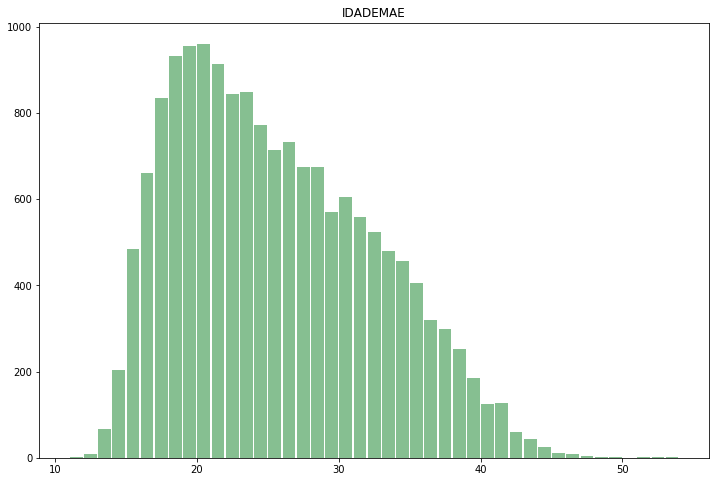

In [92]:
#@title Histograma de idade das mães de nascidos vivos em 2015 no Acre

hist = sinasc_ac2017.hist(column='IDADEMAE', bins=len(sinasc_ac2017.IDADEMAE.unique()), grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


# Tipos de Variáveis e Organização de Bases de Dados



In [45]:
#@title 
import plotly.graph_objects as go


colors = [['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)'],['rgba(0, 116, 52, 0.8)', 'rgba(0, 176, 80, 0.8)',
          'rgba(0, 234, 106, 0.8)']]

labels = [['Categorias sem ordenação. <br>Ex: sexo, estado civil, <br>fumante/não fumante',
           'Categorias com existência <br>de ordenação. <br>Ex: escolaridade, nível de colesterol, <br>faixa etária',
           'Valores mensuráveis e <br>contáveis (inteiros).<br> Resultado de contagens. <br>Ex: Número de filhos, <br>doses de álcool ingerida', 
           'Valores mensuráveis em <br>escala contínua (reais). <br>Usualmente medidos por instrumento. <br>Ex: idade, altura, pressão arterial'], 
          ['Nominais', 'Ordinais', 'Discretas', 'Contínuas'],
         ['Qualitativas', '', 'Quantitativas']]

x_data = [
          [25, 25, 25, 25],
          [25, 25, 25, 25],
          [50, 0, 50, 0]]

y_data = [' ', '  ', '   ']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for j, (xd, yd) in enumerate(zip(x_data, y_data)):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            hoverinfo ='none',
            marker=dict(
                color=colors[i//2][j],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.0, 1],
        visible=False
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        visible=False
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=10, r=10, t=10, b=10),
    showlegend=False,
)

annotations = []

for j, (yd, xd) in enumerate(zip(y_data, x_data)):
    
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(labels[j][0]),
                            font=dict(family='Arial', size=16,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    space = xd[0]
    for i in range(1, len(xd)):
      if xd[i] != 0:
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(labels[j][i]),
                                    font=dict(family='Arial', size=16,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))

            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

## Exercício - Tipos de Variáveis

Classifique cada uma das varáveis da base de dados de Nascidos Vivos do Acre em 2017 nas categorias acima

In [38]:
#@title
campos_sinasc.loc[:'25',:'VALORES']

,CAMPO,DESCRICAO,VALORES
0,NUMERODN,Número da declaração de nascido vivo,"Sequencial, por UF informante e ano"
1,LOCNASC,Local de ocorrência do nascimento,1: Hospital; 2: Outro Estab Saúde; 3: Domicílio; 4: Outros
2,CODESTAB,Código de estabelecimento de saúde.,NaN
3,CODBAINASC,Código Bairro nascimento,NaN
4,CODMUNNASC,Código do município de ocorrência,NaN
5,IDADEMAE,Idade da mãe em anos.,NaN
6,ESTCIVMAE,Estado civil da mãe,1: Solteira; 2: Casada; 3: Viúva; 4: Separado judicialmente/Divorciado
7,ESCMAE,"Escolaridade, anos de estudo concluídos",1: Nenhuma; 2: 1 a 3 anos; 3: 4 a 7 anos; 4: 8 a 11 anos; 5: 12 e mais
8,CODOCUPMAE,Ocupação da mãe,Classificação Brasileira de Ocupações (CBO 202)
9,QTDFILVIVO,Número de filhos vivos,NaN


## Resposta - Exercício Tipos de Variáveis

In [42]:
#@title
campos_sinasc.loc[:'25',campos_sinasc.columns != 'IGNORADO']

,CAMPO,DESCRICAO,VALORES,TIPO1,TIPO2
0,NUMERODN,Número da declaração de nascido vivo,"Sequencial, por UF informante e ano",Qualitativa,Nominal
1,LOCNASC,Local de ocorrência do nascimento,1: Hospital; 2: Outro Estab Saúde; 3: Domicílio; 4: Outros,Qualitativa,Nominal
2,CODESTAB,Código de estabelecimento de saúde.,NaN,Qualitativa,Nominal
3,CODBAINASC,Código Bairro nascimento,NaN,Qualitativa,Nominal
4,CODMUNNASC,Código do município de ocorrência,NaN,Qualitativa,Nominal
5,IDADEMAE,Idade da mãe em anos.,NaN,Quantitativa,Contínuo
6,ESTCIVMAE,Estado civil da mãe,1: Solteira; 2: Casada; 3: Viúva; 4: Separado judicialmente/Divorciado,Qualitativa,Nominal
7,ESCMAE,"Escolaridade, anos de estudo concluídos",1: Nenhuma; 2: 1 a 3 anos; 3: 4 a 7 anos; 4: 8 a 11 anos; 5: 12 e mais,Qualitativa,Ordinal
8,CODOCUPMAE,Ocupação da mãe,Classificação Brasileira de Ocupações (CBO 202),Qualitativa,Nominal
9,QTDFILVIVO,Número de filhos vivos,NaN,Quantitativa,Discreto


### Em ordem alfabética dos tipos

In [43]:
#@title
campos_sinasc.loc[:'25',campos_sinasc.columns != 'IGNORADO'].sort_values(['TIPO1', 'TIPO2'])

,CAMPO,DESCRICAO,VALORES,TIPO1,TIPO2
0,NUMERODN,Número da declaração de nascido vivo,"Sequencial, por UF informante e ano",Qualitativa,Nominal
1,LOCNASC,Local de ocorrência do nascimento,1: Hospital; 2: Outro Estab Saúde; 3: Domicílio; 4: Outros,Qualitativa,Nominal
2,CODESTAB,Código de estabelecimento de saúde.,NaN,Qualitativa,Nominal
3,CODBAINASC,Código Bairro nascimento,NaN,Qualitativa,Nominal
4,CODMUNNASC,Código do município de ocorrência,NaN,Qualitativa,Nominal
6,ESTCIVMAE,Estado civil da mãe,1: Solteira; 2: Casada; 3: Viúva; 4: Separado judicialmente/Divorciado,Qualitativa,Nominal
8,CODOCUPMAE,Ocupação da mãe,Classificação Brasileira de Ocupações (CBO 202),Qualitativa,Nominal
11,CODBAIRES,Código bairro residência da mãe,NaN,Qualitativa,Nominal
12,CODMUNRES,Município de residência da mãe,NaN,Qualitativa,Nominal
15,PARTO,Tipo de Parto,1: Vaginal; 2: Cesáreo,Qualitativa,Nominal


# Variáveis Quantitativas e Medidas Descritivas

## Medidas de Posição

### Média Aritmética

### Moda

### Mediana

### Quartil

### Percentil

## Medidas de Dispersão

### Desvio Médio

### Variância

### Desvio Padrão

## Amplitude Interquartil

### Coeficiente de Variação



# Variáveis Quantitativas e Representações

# Variáveis Qualitativas e Representações

# Variáveis Qualitativas - Tabela de Contingência e Medidas de Associação

# Associação entre Variáveis Qualitativas e Quantitativas

# Análise de Agrupamentos